## **Phishing URL Detection**


#### Group Number:
##### - GP_38  

#### Student Names: 
##### - Achintha H.G.R - EG/2021/4384, 
##### - S.A.U Fernando - EG/2021/4511


## 1. Introduction

Phishing attacks pose a major threat to cybersecurity, compromising user data and financial security. This project leverages machine learning techniques, specifically Random Forest and Logistic Regression models, to classify URLs as legitimate or phishing. The dataset used is the PhiUSIIL Phishing URL dataset from Kaggle.

## 2. Literature Survey

Traditional methods, such as blacklists or heuristic rules, have limitations due to their inability to adapt to new phishing techniques. Recent advances in machine learning provide a dynamic and scalable solution.

**Feature-Based Detection:**
Studies like [1] have shown that URL-based features, such as domain length, special characters, and HTTPS presence, are indicative of phishing attempts.

**Machine Learning Models:**
Random Forests are preferred for their robustness and ability to handle large datasets and feature interactions [2].
Logistic Regression is a baseline algorithm that performs well on linearly separable data and is computationally efficient [3].

**Evaluation Metrics:**
Metrics such as accuracy, precision, recall, and F1-score are crucial for evaluating phishing detection models due to class imbalance.

**References for Literature Survey:**

Zhang et al., "Phishing Detection Using Machine Learning Algorithms," 2021.

Breiman, L., "Random Forests," Machine Learning, 2001.

Ng, A., "Logistic Regression in Classification," Stanford Machine Learning Course.

## 3. Dataset Description



Dataset: PhiUSIIL Phishing URLs (Ref: "https://www.kaggle.com/datasets/joebeachcapital/phiusiil-phishing-url/code?datasetId=5229844")

Features: 56 columns, with a mix of numerical (int64, float64) and categorical (object) data.

**Target Variable:**
Label 1 corresponds to a legitimate URL, label 0 to a phishing URL

**Key Features:**

**->Categorical Columns:**

Domain: Hostname of the URL.

TLD (Top-Level Domain): .com, .org, etc.


**->Numerical Columns:**

URLLength, DomainLength: Lengths of the URL and domain.

CharContinuationRate: Probability of characters continuing logically in the URL.


**->Target Variable:**
label: The classification target.

**Additional Variable Information:**

Column "FILENAME" can be ignored.



## 4. Exploratory Data Analysis (EDA)
Exploratory Data analysis is conducted to understand the dataset’s structure, identify potential issues, and decide on preprocessing steps.


#### **4.1 Data Loading:**

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('../artifacts/PhiUSIIL_Phishing_URL_Dataset.csv')

In [3]:
# Display first few rows
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [4]:
#tuple representing the dimensions of the array
data.shape

(235795, 56)

#### **4.2 Check for duplicated values**

In [6]:
data.duplicated().sum()

np.int64(0)

No duplicated values are to be seen. So we do not want to treat them.

#### **4.3 Check for Categorical features**

In [7]:
# Basic Info
# Check feature types and nulls
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

There are few categorical features but there irrelavent for building the model.

#### **4.4 Check for null values**

In [9]:
data.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

There are no null values in the dataset. So we do not want to treat them.

In [10]:
pip install scikit-learn

## 5. Data Preprocessing


#### **5.1 Feature Reduction**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
 # Drop non-numeric columns that are not useful for feature selection
data_cleaned = data.drop(columns=['FILENAME', 'URL', 'Domain', 'TLD', 'Title'])

In [13]:
 # Separate features and target
X = data_cleaned.drop(columns=['label'])
y = data_cleaned['label']

In [14]:
# Take a random sample to reduce memory usage since dataset is large
data_sampled = data_cleaned.sample(frac=0.6, random_state=42)
X_sample = data_sampled.drop(columns=['label'])
y_sample = data_sampled['label']

In [15]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_sample, y_sample)

RandomForestClassifier(random_state=42)

In [16]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_sample.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [17]:
# Select top 15 features
top_15_features = feature_importance.head(15)
print("Top 15 Features based on Importance:\n", top_15_features)

Top 15 Features based on Importance:
                        Feature  Importance
3           URLSimilarityIndex    0.180505
49             NoOfExternalRef    0.167173
22                  LineOfCode    0.144972
47                 NoOfSelfRef    0.108827
44                   NoOfImage    0.091173
46                      NoOfJS    0.069989
36                HasSocialNet    0.033644
45                     NoOfCSS    0.033084
43            HasCopyrightInfo    0.026185
21                     IsHTTPS    0.020556
23           LargestLineLength    0.019514
32              HasDescription    0.018953
19  NoOfOtherSpecialCharsInURL    0.013821
14             NoOfDegitsInURL    0.011911
15             DegitRatioInURL    0.011571


In [18]:
# Select the top 15 features and the label column
selected_columns = top_15_features['Feature'].tolist() + ['label']
new_dataset = data_cleaned[selected_columns]

In [19]:
new_dataset.head()

,URLSimilarityIndex,NoOfExternalRef,LineOfCode,NoOfSelfRef,NoOfImage,NoOfJS,HasSocialNet,NoOfCSS,HasCopyrightInfo,IsHTTPS,LargestLineLength,HasDescription,NoOfOtherSpecialCharsInURL,NoOfDegitsInURL,DegitRatioInURL,label
0,100.0,124,558,119,34,28,0,20,1,1,9381,0,1,0,0.0,1
1,100.0,217,618,39,50,8,1,9,1,1,9381,0,2,0,0.0,1
2,100.0,5,467,42,10,7,0,2,1,1,682,1,2,0,0.0,1
3,100.0,31,6356,22,3,15,1,27,1,1,26824,0,1,0,0.0,1
4,100.0,85,6089,72,244,34,1,15,1,1,28404,1,1,0,0.0,1


In [20]:
new_dataset.to_csv('top_15_features_dataset.csv', index=False)

In [21]:
data = pd.read_csv('top_15_features_dataset.csv')

In [22]:
data.head()

,URLSimilarityIndex,NoOfExternalRef,LineOfCode,NoOfSelfRef,NoOfImage,NoOfJS,HasSocialNet,NoOfCSS,HasCopyrightInfo,IsHTTPS,LargestLineLength,HasDescription,NoOfOtherSpecialCharsInURL,NoOfDegitsInURL,DegitRatioInURL,label
0,100.0,124,558,119,34,28,0,20,1,1,9381,0,1,0,0.0,1
1,100.0,217,618,39,50,8,1,9,1,1,9381,0,2,0,0.0,1
2,100.0,5,467,42,10,7,0,2,1,1,682,1,2,0,0.0,1
3,100.0,31,6356,22,3,15,1,27,1,1,26824,0,1,0,0.0,1
4,100.0,85,6089,72,244,34,1,15,1,1,28404,1,1,0,0.0,1


In [23]:
X = data.drop(columns=['label'])
y = data['label']

In [24]:
X

,URLSimilarityIndex,NoOfExternalRef,LineOfCode,NoOfSelfRef,NoOfImage,NoOfJS,HasSocialNet,NoOfCSS,HasCopyrightInfo,IsHTTPS,LargestLineLength,HasDescription,NoOfOtherSpecialCharsInURL,NoOfDegitsInURL,DegitRatioInURL
0,100.000000,124,558,119,34,28,0,20,1,1,9381,0,1,0,0.000
1,100.000000,217,618,39,50,8,1,9,1,1,9381,0,2,0,0.000
2,100.000000,5,467,42,10,7,0,2,1,1,682,1,2,0,0.000
3,100.000000,31,6356,22,3,15,1,27,1,1,26824,0,1,0,0.000
4,100.000000,85,6089,72,244,34,1,15,1,1,28404,1,1,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,100.000000,191,2007,187,51,21,1,7,1,1,9381,1,1,0,0.000
235791,100.000000,31,1081,88,50,7,1,1,0,1,348,1,2,0,0.000
235792,100.000000,67,709,58,27,30,1,10,1,1,13277,1,1,0,0.000
235793,28.157537,0,125,0,0,3,0,0,0,1,1807,0,5,3,0.055


In [25]:
y

0         1
1         1
2         1
3         1
4         1
         ..
235790    1
235791    1
235792    1
235793    0
235794    1
Name: label, Length: 235795, dtype: int64

#### **5.2 Train-Test Split**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
X_train.shape

(165056, 15)

In [28]:
X_test.shape

(70739, 15)

In [29]:
X_train.duplicated().sum()

np.int64(11003)

In [30]:
# Drop duplicates from X_train
X_train_no_duplicates=X_train.drop_duplicates()

# Now filter y_train using the indices of the remaining X_train rows after dropping duplicates
y_train_no_duplicates = y_train[X_train_no_duplicates.index]

In [31]:
# Check the shapes to confirm they match
X_train_no_duplicates.shape,y_train_no_duplicates.shape

((154053, 15), (154053,))

#### **5.3 Feature Selection**

In [32]:
#calculating the correlation 
correlation_matrix = X_train_no_duplicates.corr()  
correlation_matrix

,URLSimilarityIndex,NoOfExternalRef,LineOfCode,NoOfSelfRef,NoOfImage,NoOfJS,HasSocialNet,NoOfCSS,HasCopyrightInfo,IsHTTPS,LargestLineLength,HasDescription,NoOfOtherSpecialCharsInURL,NoOfDegitsInURL,DegitRatioInURL
URLSimilarityIndex,1.000000,0.210743,0.220626,0.271236,0.238635,0.293082,0.671112,0.311453,0.612269,0.366589,-0.085172,0.585760,-0.569292,-0.339732,-0.568536
NoOfExternalRef,0.210743,1.000000,0.316071,0.723011,0.195512,0.138259,0.220095,0.183507,0.197721,0.148585,-0.002929,0.146272,-0.093927,-0.049376,-0.104444
LineOfCode,0.220626,0.316071,1.000000,0.371785,0.372422,0.181751,0.246168,0.185197,0.210301,0.160767,0.005674,0.190752,-0.098295,-0.050461,-0.106687
NoOfSelfRef,0.271236,0.723011,0.371785,1.000000,0.289390,0.167026,0.287645,0.196925,0.254073,0.189469,-0.003876,0.221603,-0.120183,-0.063819,-0.135139
NoOfImage,0.238635,0.195512,0.372422,0.289390,1.000000,0.144374,0.260113,0.122934,0.228517,0.170281,-0.000914,0.227347,-0.107630,-0.055385,-0.114964
NoOfJS,0.293082,0.138259,0.181751,0.167026,0.144374,1.000000,0.325147,0.331231,0.284796,0.214660,0.003659,0.239438,-0.122849,-0.063314,-0.138013
HasSocialNet,0.671112,0.220095,0.246168,0.287645,0.260113,0.325147,1.000000,0.330266,0.586513,0.470190,-0.030585,0.553527,-0.303411,-0.158798,-0.337125
NoOfCSS,0.311453,0.183507,0.185197,0.196925,0.122934,0.331231,0.330266,1.000000,0.304176,0.228551,-0.006777,0.213003,-0.134947,-0.070268,-0.151441
HasCopyrightInfo,0.612269,0.197721,0.210301,0.254073,0.228517,0.284796,0.586513,0.304176,1.000000,0.456747,-0.015929,0.528616,-0.240506,-0.117319,-0.302855
IsHTTPS,0.366589,0.148585,0.160767,0.189469,0.170281,0.214660,0.470190,0.228551,0.456747,1.000000,0.011361,0.418527,-0.045446,-0.022188,-0.114356


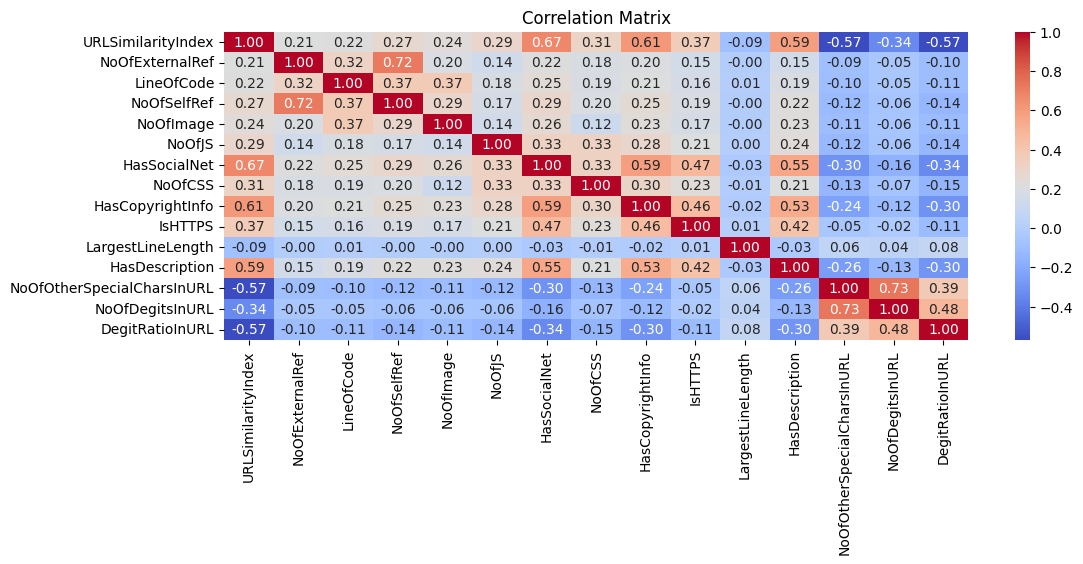

In [33]:
#plotting the correlation heatmap
plt.figure(figsize=(12, 4))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [34]:
# Create a mask for the upper triangle
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation above the threshold (e.g., 0.8)
threshold = 0.8
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print("Features to drop:", to_drop)

Features to drop: []


conclusion: There are no features to be dropped as there are no highly correlated features.

#### **5.4 Handling Imbalanced Dataset**

In [35]:
# Check whether data set is imbalanced
y_train_no_duplicates.value_counts()

label
1    94310
0    59743
Name: count, dtype: int64

In [46]:
y_train.value_counts()

label
1    94397
0    70659
Name: count, dtype: int64

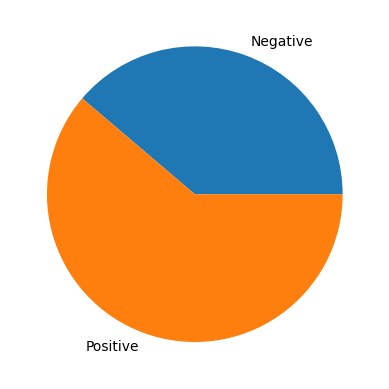

In [36]:
# Create a pie chart to visualize the distribution of classes
# Here, the two classes are labeled 'Negative' and 'Positive'
plt.pie(np.array([y_train_no_duplicates.value_counts()[0], y_train_no_duplicates.value_counts()[1]]), labels=['Negative', 'Positive'])
plt.show()

In [37]:
!pip install imbalanced-learn

In [38]:
# Apply SMOTE to oversample the minority class in the training data
# X_train_smote and y_train_smote are the resampled versions of the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_no_duplicates, y_train_no_duplicates)
print(X_train_smote.shape, y_train_smote.shape)

(188620, 15) (188620,)


In [39]:
# y_train_smote.value_counts() should now show an equal number of samples for each class
y_train_smote.value_counts()

label
1    94310
0    94310
Name: count, dtype: int64

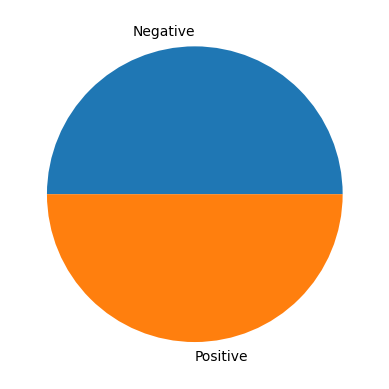

In [40]:
# Create a pie chart to visualize the new distribution of classes after SMOTE
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Negative', 'Positive'])
plt.show()

## 6. Model Training and Evaluation

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [42]:
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

#### **6.1 Logistic Regression**

In [52]:
# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=4000)

# Train the model using the SMOTE-resampled training data
lr.fit(X_train_smote, y_train_smote)

# Predict the target labels for the training set
y_train_pred = lr.predict(X_train_smote)

# Predict the target labels for the test set (unseen data)
y_test_pred = lr.predict(X_test)

# Evaluate performance on the training set
training_scores(y_train_smote, y_train_pred)

# Evaluate performance on the test set (validation/testing phase)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


#### **6.2 Random Forest**

In [49]:
rf = RandomForestClassifier()

rf.fit(X_train_smote, y_train_smote)

y_train_pred = rf.predict(X_train_smote)

y_test_pred = rf.predict(X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


#### **Naive Bayes**

In [50]:
mnb = MultinomialNB()
mnb.fit(X_train_smote, y_train_smote)

y_train_pred = mnb.predict(X_train_smote)

y_test_pred = mnb.predict(X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.636
	Precision = 0.581
	Recall = 0.977
	F1-Score = 0.729
Testing Scores:
	Accuracy = 0.686
	Precision = 0.65
	Recall = 0.978
	F1-Score = 0.781


#### **Decision Trees**

In [51]:
dt = DecisionTreeClassifier()

dt.fit(X_train_smote, y_train_smote)

y_train_pred = dt.predict(X_train_smote)

y_test_pred = dt.predict(X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


#### **Support Vector Machine**

In [67]:
svm = SVC()

svm.fit(X_train_smote, y_train_smote)

y_train_pred = svm.predict(X_train_smote)

y_test_pred = svm.predict(X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.898
	Precision = 0.991
	Recall = 0.804
	F1-Score = 0.888
Testing Scores:
	Accuracy = 0.883
	Precision = 0.994
	Recall = 0.8
	F1-Score = 0.887


## 6. Conclusion


Based on the observed performance metrics, both the Logistic Regression and Random Forest models demonstrate perfect performance on both the training and testing datasets, achieving an accuracy, precision, recall, and F1-score of 1.0 across the board.

Key Insights:
Perfect Scores Across Metrics: Both models perfectly classify the data, indicating no misclassifications in both training and testing phases.

Impact of SMOTE: The use of SMOTE (Synthetic Minority Oversampling Technique) likely addressed class imbalance effectively, contributing to improved performance. 